<a href="https://colab.research.google.com/github/aryafridayana/Machine-Learning/blob/Task-Week-9/week-9/BinaryClassificationNNHousePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


###Arya Fridayana Gastiadi
###1103210082
###Lecture 9 : Binary Classsification Using Neural Network
###Dataset : housepricedata
###Dokumentasi ChatGPT : https://chatgpt.com/share/bbc61205-8b9f-4d61-abcd-749a6d6bd066

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Tentukan path ke file CSV di Google Drive
file_path = '/content/drive/MyDrive/Dataset/housepricedata.csv'

# Baca dataset ke dalam pandas DataFrame
df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama dari DataFrame
df.head()


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   LotArea           1460 non-null   int64
 1   OverallQual       1460 non-null   int64
 2   OverallCond       1460 non-null   int64
 3   TotalBsmtSF       1460 non-null   int64
 4   FullBath          1460 non-null   int64
 5   HalfBath          1460 non-null   int64
 6   BedroomAbvGr      1460 non-null   int64
 7   TotRmsAbvGrd      1460 non-null   int64
 8   Fireplaces        1460 non-null   int64
 9   GarageArea        1460 non-null   int64
 10  AboveMedianPrice  1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


In [ ]:
X = df.drop(columns=['AboveMedianPrice'])
y = df['AboveMedianPrice']

In [ ]:
#Normalisasi fitur
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Membagi data menjadi set pelatihan dan pengujian
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42)

In [ ]:
# Membangun model jaringan saraf tiruan
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Kompilasi model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Evaluasi model
loss = model.evaluate(X_test, y_test)
print(f'Loss pada data uji: {loss}')

14/14 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5297
Loss pada data uji: [0.6871792674064636, 0.5296803712844849]


In [ ]:
# Prediksi dengan model
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val), verbose=0)

In [ ]:
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

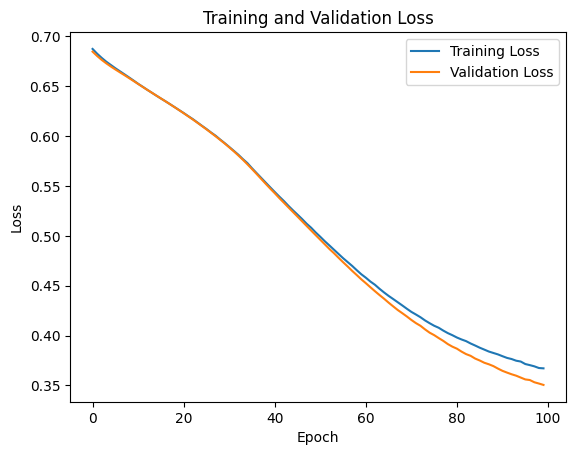

In [ ]:
# Plot loss and accuracy
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

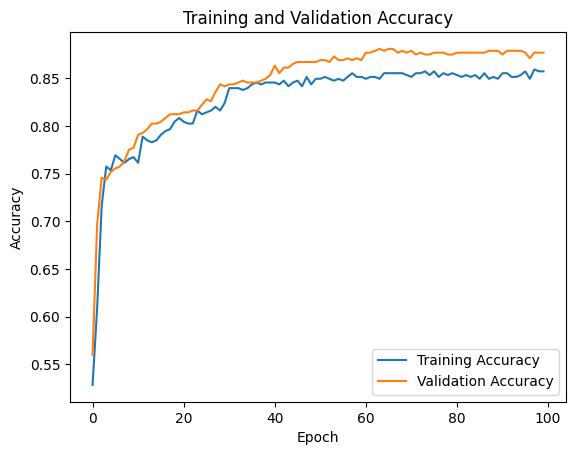

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()